# Regression in Sciiikit-Learn

In [2]:
# import libraries

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

# other
'''
ham ne puri ki puri library ko import nahi karna , jabke hamei jo module hamei chahiye us waqt wo import kar lein, matlab ye ke 
jab bhi zarurat pare tab hi apni marzi ka module import karei, 
 '''
# aur jab bhi ham scikit learn library import karei us se pehle ye wala module lazmi import karei

from sklearn.model_selection import train_test_split            # ye data ko split karta hai

# importing linear regresion module from scikit learn

from sklearn.linear_model import LinearRegression




ModuleNotFoundError: No module named 'pandas'

In [ ]:
# import dataset
'''
agr ham ne apne data laaana hai to pandas ki library use karni hai

'''

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_linear = df[['age','fare']]

In [ ]:
### simple linear regression ''' is me hamare pass srif aik value dependent ki hogi aur aik indipendent ki'''

x= df[['age'] ]   # independent  # x ko ham ne double dimension me rakhni hai hameisha 
y= df['fare']   # dependent

In [ ]:
df_linear.isnull().sum() / len(x) * 100 # for checking null values in age

NameError: name 'x' is not defined

In [ ]:
df_linear['age'].fillna(df_linear['age'].mean(), inplace= True)

/tmp/ipykernel_33847/3372716581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear['age'].fillna(df_linear['age'].mean(), inplace= True)


In [ ]:
df_linear

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


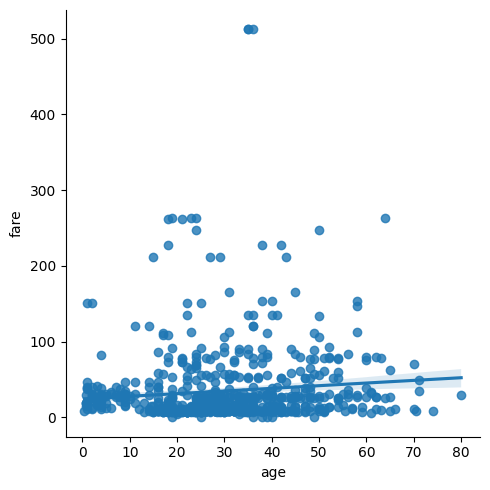

In [ ]:
# PLOT
import seaborn as sns
sns.lmplot(df_linear, x= 'age', y= 'fare',)         # linear plot

<Axes: ylabel='age'>

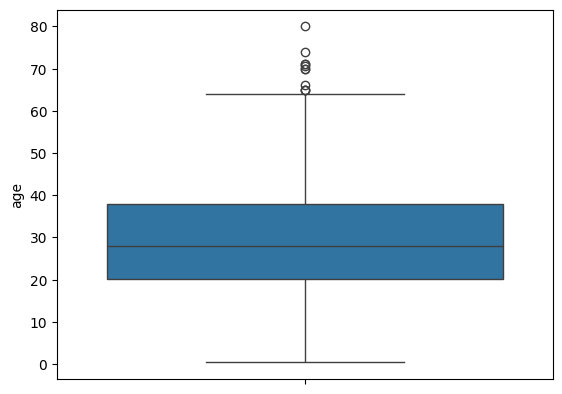

In [ ]:
sns.boxplot(df_linear, y='age')

In [ ]:
df_linear = df_linear[(df_linear['age'] > 5) & (df_linear['age'] < 65)]

## ** Removing Outliers:**

<Axes: ylabel='age'>

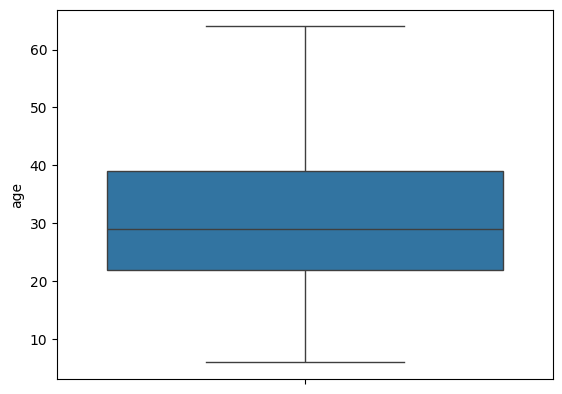

In [ ]:
sns.boxplot(df_linear, y='age')

<Axes: ylabel='fare'>

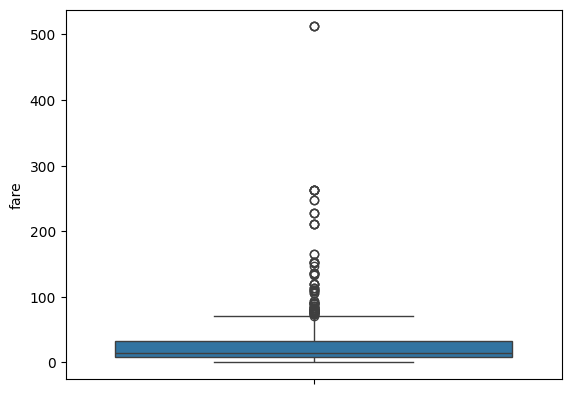

In [ ]:
sns.boxplot(df_linear, y='fare')

In [ ]:
df_linear['fare'].min()

0.0

In [ ]:
df_linear = df_linear [(df_linear['fare']>0)& (df['fare']<55)]

/tmp/ipykernel_36824/4210993794.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_linear = df_linear [(df_linear['fare']>0)& (df['fare']<55)]


<Axes: ylabel='fare'>

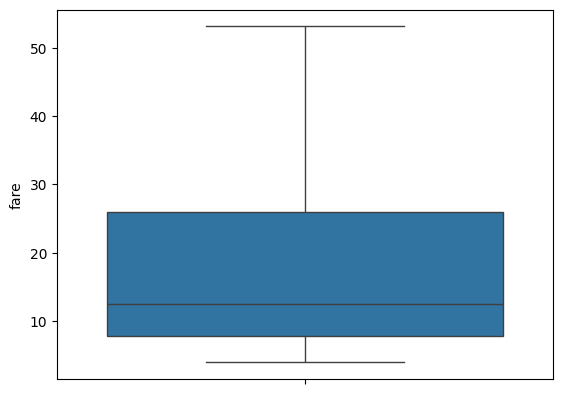

In [ ]:
sns.boxplot(df_linear, y='fare')

In [ ]:
X = df_linear[['age']]
y = df_linear['fare']

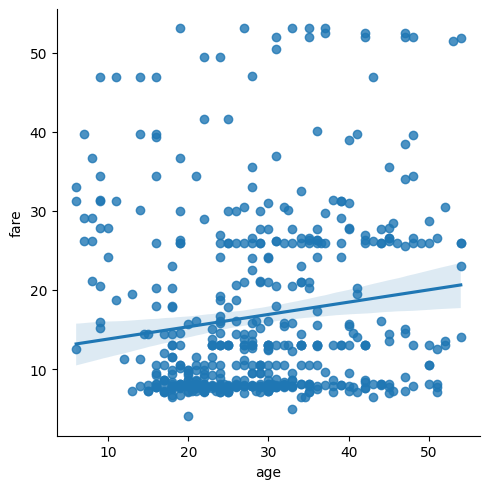

In [ ]:
sns.lmplot(df_linear, x='age', y='fare')

logically to hamei yaha linear regression nahi karna chahiye balke neighbour wala KNN karna chahiye hai

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# model bula lein 

model = LinearRegression()

# train the model

model.fit(X,y)

LinearRegression()

In [ ]:
# predict the dependent value (fare)
model.predict([[33]])

/home/anony_khan/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.37220171])

ab ham ne isko check bhi to karna hai model kese chal raha hai

Regression honge to kese matrics honge?

### **`Model evaluation with metrics`**
1. r2
2. mean squared error --> iska squared root lene se ye ban jaey ga --> RMSE
3. MAE
4. RMSE


<Axes: xlabel='fare'>

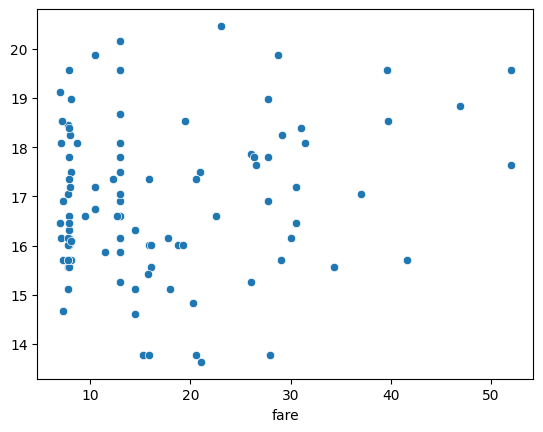

In [ ]:
# split
X_train, X_test, y_train , y_test = train_test_split(X,y, train_size = 0.8)

# model
model = LinearRegression()

# train

model.fit(X_train,y_train)

# prediction of the of the remaining X_test data to find the 
# y_test and then we will compare it with the orignal y_test values

predictions = model.predict(X_test)

# compare with orignal values

sns.scatterplot(x= y_test, y= predictions)

ham ne dekh lia ke saare khush nahi hai, matlab ye ke iski accuracy theek nahi hai, agr theek hoti to ye aik line ke ander arrange hotei.

---

In [ ]:
model.score(X_test, y_test)

-0.001879849647195675

Typically, an accuracy score above `0.7` describes an average model performance, whereas a score above `0.9` indicates a good model. However, the relevance of the score is determined by the task.

----

kuch aur bhi matrix hotei hai jin ke through hum apne model ko check kar saktei hai

un modules ko import karna hai scikit learn se

In [ ]:
# import all the modules for checking the acuracy or working of our model.

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# now applying the above metrics

MAE = mean_absolute_error(y_true = y_test, y_pred = predictions)

MSE = mean_squared_error(y_true=y_test, y_pred = predictions)

RMSE = mean_squared_error(y_true= y_test, y_pred = predictions , squared= False)

R2 = r2_score(y_true = y_test, y_pred = predictions)

# zyada tar research mei RMSE chalti hai

print('MAE = ',MAE)
print('MSE = ',MSE)
print('r2 =',R2)
print('RMSE = ',RMSE)

MAE =  8.470966546244355
MSE =  109.08541774020492
r2 = -0.001879849647195675
RMSE =  10.444396475632516


### **`RMSE`** second method

In [ ]:
import numpy as np
RMSE = np.sqrt(MSE)   # square root
RMSE

10.444396475632516

### **`Assignment:`**
Iris ka data set import karna hai aur phir usi mei se kisi do columns ko le kar us per linear regression machine learning algorithm apply karna hai